# Laboratorium 1 — Wprowadzenie do uczenia maszynowego

#### Jakub Szaredko

## Konfiguracja

In [1]:
RANDOM_SEED = 42

## Pobranie, wczytanie i wstępne przetworzenie zbioru danych Ionosphere

In [2]:
from typing import cast
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load the Ionosphere dataset
dataset = fetch_openml(name="ionosphere", version=1, as_frame=False)

# Extract features and labels
X = cast(np.ndarray, dataset.data)
y = cast(np.ndarray, dataset.target)

# Normalise the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert labels to binary (0 for 'b' and 1 for 'g')
y = cast(np.ndarray, (y == 'g').astype(int))

## Inicjalizacja klasy `KFold`

In [3]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

# Sprawdzian krzyżowy modeli

In [4]:
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

decision_tree = DecisionTreeClassifier(max_depth=5, random_state=RANDOM_SEED)
random_forest = RandomForestClassifier(max_depth=5, random_state=RANDOM_SEED)
logistic_regression = LogisticRegression(random_state=RANDOM_SEED)
support_vector_machine = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    random_state=RANDOM_SEED
)
multilayer_perceptron = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    max_iter=500,
    random_state=RANDOM_SEED
)

classifiers: dict[str, BaseEstimator] = {
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Logistic Regression": logistic_regression,
    "Support Vector-Machine": support_vector_machine,
    "Multi-layer Perceptron": multilayer_perceptron,
}


for name, classifier in classifiers.items():
  print(f"Score for {name}")
  scores = cross_val_score(classifier, X, y, cv=kfold, scoring="f1")
  print(f"F1: Mean = {scores.mean():.4f}, Std = {scores.std():.4f}")
  print()

Score for Decision Tree
F1: Mean = 0.9248, Std = 0.0131

Score for Random Forest
F1: Mean = 0.9485, Std = 0.0147

Score for Logistic Regression
F1: Mean = 0.9063, Std = 0.0196

Score for Support Vector-Machine
F1: Mean = 0.9555, Std = 0.0156

Score for Multi-layer Perceptron
F1: Mean = 0.9452, Std = 0.0234



## Pobranie, wczytanie i wstępne przetworzenie zbioru danych `space.csv`

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("./data/space.csv")

# Extract features and labels
X = df.iloc[:, :2]
y = df.iloc[:, -1]

# Normalise the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Trening modeli

In [6]:
for i, (name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X.values, y)

## Wizualizacja domen

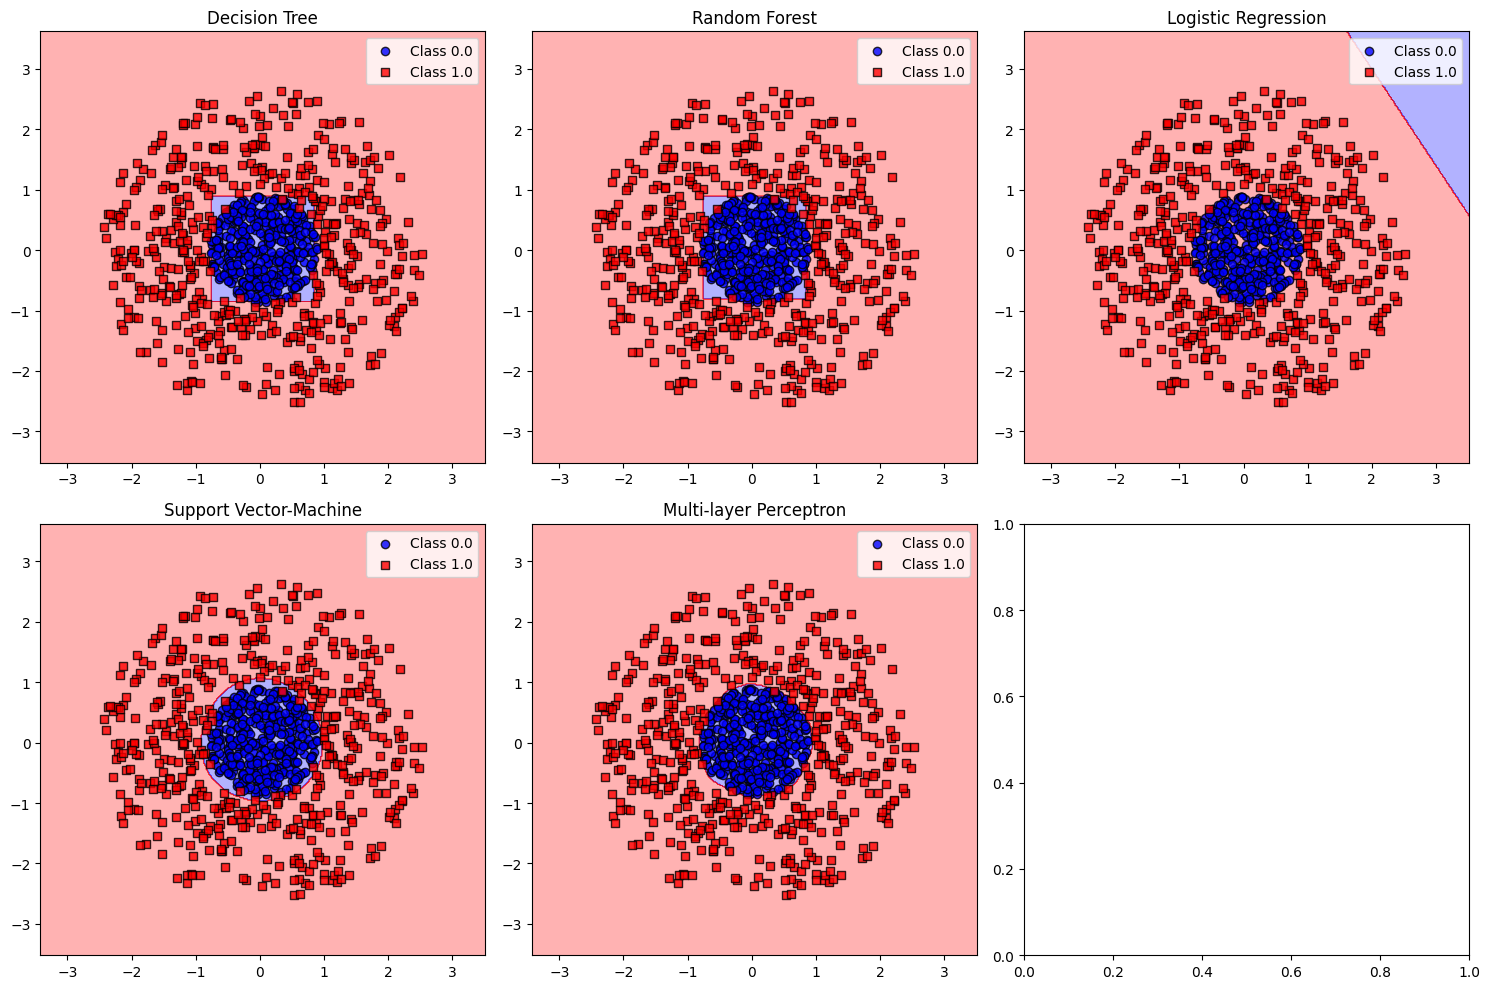

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_decision_regions(
    classifier: BaseEstimator,
    X: pd.DataFrame,
    y: pd.Series,
    title: str,
    resolution=0.02
) -> None:
    markers = ("o", "s", "^", "v", "<")
    colors = ("blue", "red", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl].iloc[:, 0],
            y=X[y == cl].iloc[:, 1],
            alpha=0.8,
            c=colors[idx],
            marker=markers[idx],
            label=f"Class {cl}",
            edgecolor="black"
        )

    plt.title(title)
    plt.legend()


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (name, classifier) in enumerate(classifiers.items()):
    plt.sca(axes[i])
    plot_decision_regions(classifier, X, y, name)

plt.tight_layout()
plt.show()

## Klasteryzacja za pomocą algorytmu k-means losowej dystrybucji danych

<p float="left">
  <img src="./images/kmeans-1.png" />
  <img src="./images/kmeans-2.png" /> 
</p>